<a href="https://colab.research.google.com/github/nurbols/ML_Project/blob/main/ML_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#download data from using the link
df = pd.read_csv('/content/drive/MyDrive/Salaries.csv')

In [ ]:
df['TotalPay'].head(5)

0    567595.43
1    538909.28
2    335279.91
3    332343.61
4    326373.19
Name: TotalPay, dtype: float64

In [ ]:
df.head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [ ]:
df["Year"].value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

In [ ]:
df["Year"].mean()

2012.5226431848453

In [ ]:
df["EmployeeName"].isnull().value_counts()

False    148654
Name: EmployeeName, dtype: int64


The following instructions must be applied to columns columns BasePay, OvertimePay, Benefits, TotalPay, TotalPayBenefits, Year
1.  Calculate standard deviation and variance without applying the methods (std() и variance())
2.   Calculate standard deviation and variance by applying the methods (std() и variance())
3. Calculate coefficient of covariance and range
4. Calculate measures of central tendency
5. Apply describe() method
6. Build histograms
7. Build boxplots
8. Calculate IQR
8. Write a short summary of your findings (no more than 100 words). Are there any outliers? Anything special?



In [ ]:
from numpy import NaN
df["EmployeeName"]=df["EmployeeName"].replace("Not provided",NaN, regex=True)

df["EmployeeName"].isnull().value_counts()
df["EmployeeName"]=df["EmployeeName"].dropna()

In [ ]:
from numpy import NaN


def data(column):

  df[column]=df[column].replace("Not Provided",NaN, regex=True).astype(float)

  col=df[column].dropna()

  df[column]=df[column].replace(NaN,col.mean(), regex=True)
  var=0
  for i in df[column]:
    var=var+((i-df[column].mean())**2)
  var=var/len(df[column])

  print(str(column)+"- variance: " + str(var)+"; standard deviation: "+ str(var**1/2))


In [ ]:
list=["BasePay", "OvertimePay", "Benefits", "TotalPay", "TotalPayBenefits","Year"]
print("Variance and standard deviation calculated without functions std() and var()")
for i in list:
  print(data(i))

Variance and standard deviation calculated without functions std() and var()
BasePay- variance: 1821309531.3710973; standard deviation: 910654765.6855487
None
OvertimePay- variance: 131198420.95561926; standard deviation: 65599210.47780963
None
Benefits- variance: 179516233.78687814; standard deviation: 89758116.89343907
None
TotalPay- variance: 2551950654.682806; standard deviation: 1275975327.341403
None
TotalPayBenefits- variance: 3943001322.441735; standard deviation: 1971500661.2208674
None
Year- variance: 1.2488818534288821; standard deviation: 0.6244409267144411
None


In [ ]:
print("Variance and standard deviation calculated using functions std() and var()")
for i in list:
  print(str(i)+"- Variance: "+ str(df[i].var())+"; Standard deviation: "+str(df[i].std()));
  print(str(i)+" Coefficient of variance: "+str(round(df[i].std()/df[i].mean(),2))+"; Range: "+ str(max(df[i])-min(df[i])));
  print(str(i)+" Mean: "+ str(round(df[i].mean(),2))+"; Mode: "+str(df[i].mode())+ "; Median: "+str(df[i].median()));


Variance and standard deviation calculated using functions std() and var()
BasePay- Variance: 1821321783.4582977; Standard deviation: 42676.946744797686
BasePay Coefficient of variance: 0.64; Range: 319441.02
BasePay Mean: 66325.45; Mode: 0    0.0
Name: BasePay, dtype: float64; Median: 65092.19
OvertimePay- Variance: 131199303.53720175; Standard deviation: 11454.22644866085
OvertimePay Coefficient of variance: 2.26; Range: 245131.89
OvertimePay Mean: 5066.06; Mode: 0    0.0
Name: OvertimePay, dtype: float64; Median: 0.0
Benefits- Variance: 179517441.40618783; Standard deviation: 13398.411898661268
Benefits Coefficient of variance: 0.54; Range: 96604.55
Benefits Mean: 25007.89; Mode: 0    25007.893151
Name: Benefits, dtype: float64; Median: 25007.89315082985
TotalPay- Variance: 2551967821.848279; Standard deviation: 50517.00527394987
TotalPay Coefficient of variance: 0.68; Range: 568213.56
TotalPay Mean: 74768.32; Mode: 0    0.0
Name: TotalPay, dtype: float64; Median: 71426.60999999999


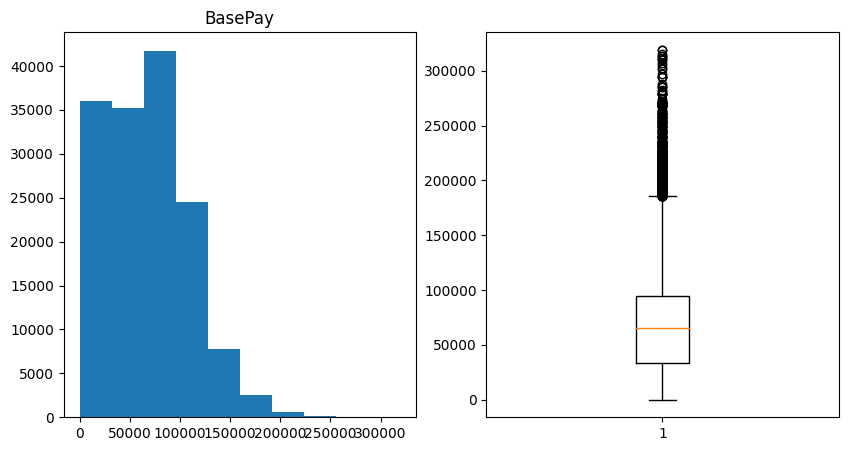

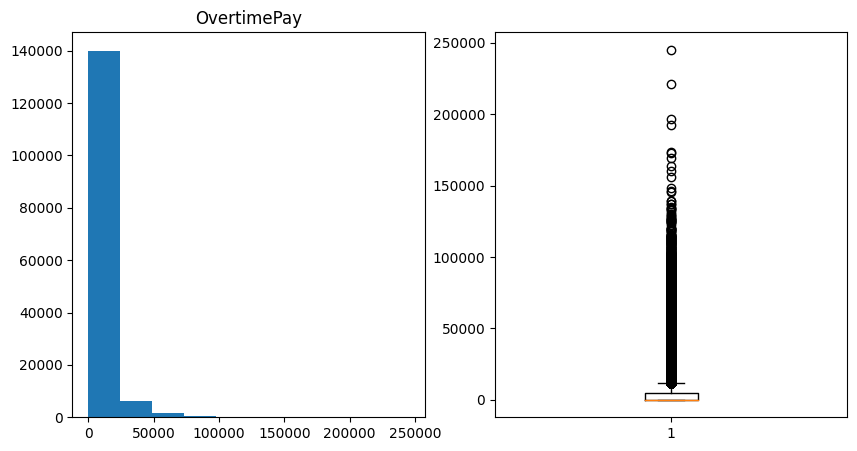

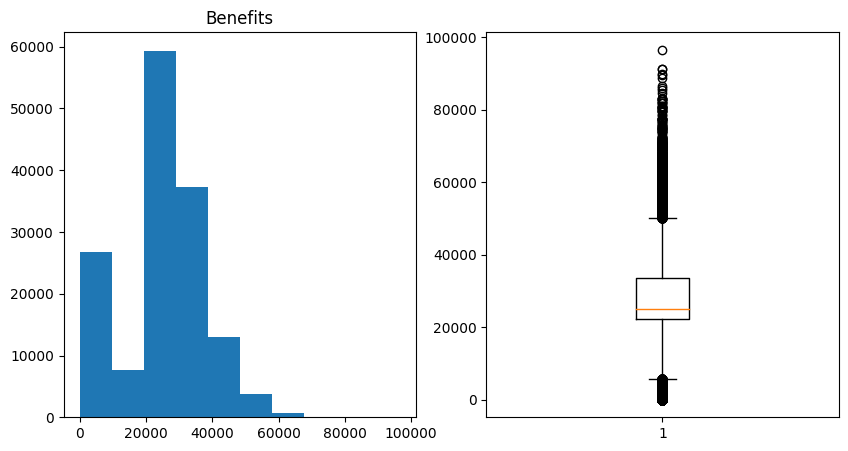

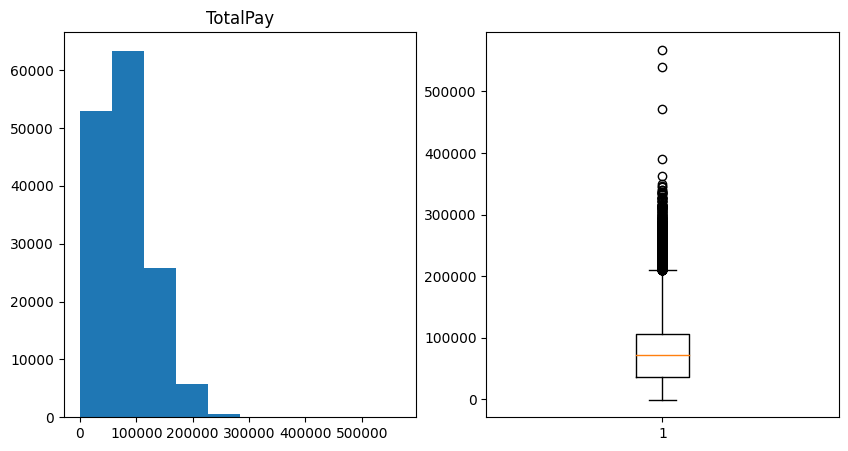

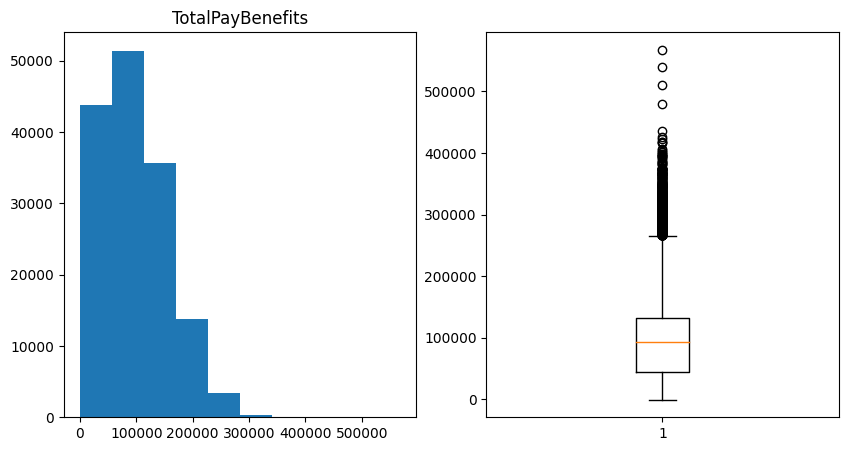

In [ ]:
s=0
while s<5:
  fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
  ax[0].set_title(list[s])
  ax[0].hist(df[list[s]])
  ax[1].boxplot(df[list[s]])
  s=s+1

In [ ]:
df.nunique(axis=0)

Id                  148654
EmployeeName        110810
JobTitle              2159
BasePay             109490
OvertimePay          65999
OtherPay             84968
Benefits             98466
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   2
dtype: int64

In [ ]:
df.describe()

,Id,BasePay,OvertimePay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,66325.448840,5066.059886,25007.893151,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,42676.946745,11454.226449,13398.411899,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-166.010000,-0.010000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,33847.017500,0.000000,22342.297500,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,65092.190000,0.000000,25007.893151,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,94605.740000,4658.667500,33468.980000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


<Axes: >

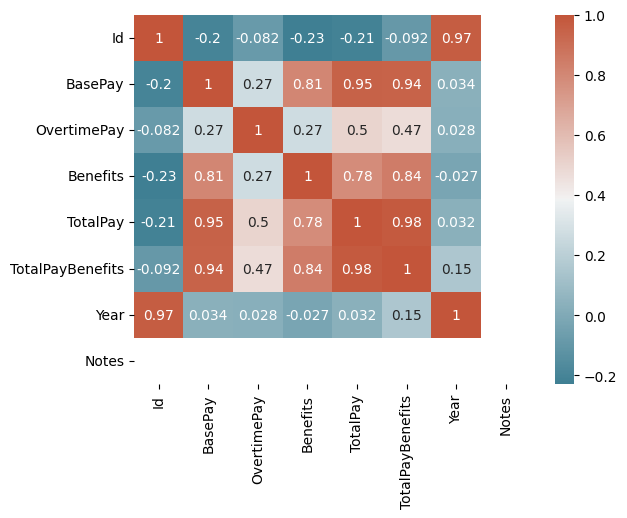

In [ ]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

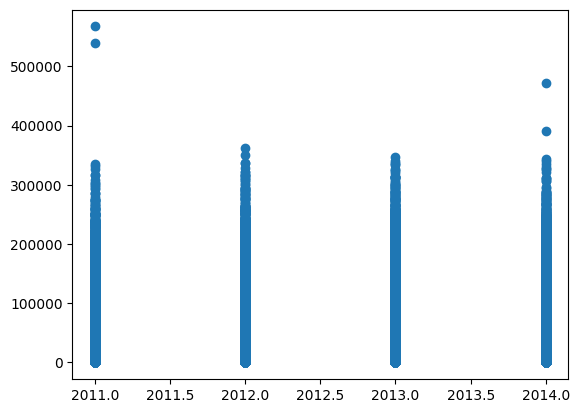

In [ ]:
#Finding outliers  for each year Ex: TotalPay
plt.scatter( df["Year"],df["TotalPay"]);

In [ ]:
#Function for IQR
def IQR(column):
  sorte=df[column].sort_values()
  index1=int(len(sorte)*0.25)
  index2=int(len(sorte)*0.75)
  iqr=sorte[index2]-sorte[index1]
  return iqr
IQR(input("IQR: "))

IQR: BasePay


10188.720000000001